In [1]:
import nltk

from nltk.corpus import stopwords
from collections import Counter

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn import datasets, model_selection, linear_model, metrics

import pickle

import os

# 추가한 라이브러리
import re
import joblib

import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from tqdm import tqdm

In [3]:
#open 피클 

game_df_b50 = joblib.load('../preprocessing/game_pkl/best_games_150.pkl')

In [4]:
#불용어 사전

stop_words = stopwords.words("english")

In [5]:
# ※정규식 필터링 추가

review_word_pattern = re.compile(r'[A-Za-z]+')

In [6]:
# lemmertizer 생성

lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [7]:
#모든 리뷰 꺼내며 불용어 처리

b_games_review = []

for k in tqdm(range(len(game_df_b50))): 
    
    game_review = ''
    
    for i in range(100):
    
        try:
            game_review += game_df_b50.at[k, i]['review']
            
        except:
            pass
    
    #문장 tokenize, pos tagg, lemmertize
    tags = nltk.pos_tag([word if len(word) > 2 else '' for word in re.findall(review_word_pattern, game_review)])
    
    word_list = []
    
    for word, tag in tags:
        
        if word.lower() not in stop_words:
            
            if tag.startswith('N') or tag.startswith('V') or tag.startswith('R'):
                word_list.append(lemmatizer.lemmatize(word.lower(), tag[0].lower()))
                
            elif tag.startswith('J'):
                word_list.append(lemmatizer.lemmatize(word.lower(), 'a'))
                
            elif tag.startswith('F') or tag.startswith('U'):
                word_list.append(word.lower())
    
    # 문장 재봉합
    game_review = ' '.join(word_list)
            
    b_games_review.append(game_review)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:06<00:00,  2.27it/s]


In [7]:
b_games_review[0]

'easily  best  well know  release year includes beautiful plot hint challenge enough  keep interested become  game  random clicking  ost  incredible shu takumi do  excellent job game  aesthetic  concept   hop  see  sequel  form hand  best game   ghost trick  completely brilliant start  finish great puzzle fantastic character  engage story  truly awesome end character  fully realise everyone  part  play  stellar tale puzzle   bit hit miss occassionally  forgive      utterly likeable innovative addictive style  gameplay engage story rich  creativity cliche catchy music fit situation  game  cast  unforgettable character eccentric personality ghost trick  truly  heartfelt magical experience prove amazing  handheld video game make someone feel show nintendo   still  worthy console phenomenal game  perfect blend  puzzle solve mystery creative gameplay character charm story  captivating puzzle generally well do  strange one  love  good mystery game  something play  pick game expect good thing

In [8]:
vectorizer = TfidfVectorizer()

In [9]:
X = vectorizer.fit_transform(b_games_review)

In [10]:
pd.DataFrame(cosine_similarity(X)) # 정규식 적용하지 않은 노트북 파일의 출력결과와 비교

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,0.273473,0.144282,0.400421,0.421732,0.491977,0.246388,0.440388,0.345057,0.441446,...,0.361866,0.300024,0.421921,0.337857,0.333304,0.366557,0.269198,0.507142,0.416008,0.475812
1,0.273473,1.000000,0.144007,0.234310,0.222570,0.283635,0.213757,0.255312,0.205014,0.270525,...,0.223423,0.203230,0.252654,0.210639,0.190132,0.214970,0.165423,0.288700,0.247377,0.277523
2,0.144282,0.144007,1.000000,0.134661,0.122481,0.134637,0.155706,0.135982,0.103841,0.139103,...,0.111068,0.084210,0.122971,0.104641,0.091827,0.108646,0.086524,0.150262,0.121849,0.139456
3,0.400421,0.234310,0.134661,1.000000,0.628363,0.349208,0.245243,0.390464,0.305698,0.371023,...,0.323071,0.282647,0.353418,0.300731,0.270657,0.326681,0.240333,0.418423,0.360478,0.405722
4,0.421732,0.222570,0.122481,0.628363,1.000000,0.365374,0.250462,0.390773,0.308806,0.383092,...,0.314236,0.273323,0.342579,0.294231,0.268853,0.311021,0.239623,0.402603,0.354140,0.389404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.366557,0.214970,0.108646,0.326681,0.311021,0.335793,0.210307,0.419400,0.332921,0.402152,...,0.365899,0.303726,0.401775,0.342026,0.292743,1.000000,0.249082,0.453535,0.394698,0.434963
146,0.269198,0.165423,0.086524,0.240333,0.239623,0.254169,0.150854,0.310347,0.231527,0.281099,...,0.246932,0.216986,0.278552,0.245014,0.209293,0.249082,1.000000,0.309265,0.277170,0.310346
147,0.507142,0.288700,0.150262,0.418423,0.402603,0.514494,0.261451,0.532540,0.429416,0.538434,...,0.452887,0.358631,0.498931,0.479461,0.385712,0.453535,0.309265,1.000000,0.492530,0.596857
148,0.416008,0.247377,0.121849,0.360478,0.354140,0.401255,0.220960,0.448782,0.360887,0.470126,...,0.410653,0.341672,0.876112,0.356406,0.379205,0.394698,0.277170,0.492530,1.000000,0.484972


In [11]:
game_df_b50.iloc[44]

platform                                                Switch
title                                 Monster Rancher 1 & 2 DX
publisher                                     Koei Tecmo Games
static       {'user': {'positive': 43, 'mixed': 0, 'negativ...
detail       {'summary': 'Welcome to the magical world of M...
                                   ...                        
95                                                         NaN
96                                                         NaN
97                                                         NaN
98                                                         NaN
99                                                         NaN
Name: 44, Length: 106, dtype: object

In [12]:
game_df_b50.iloc[0]

platform                                                    DS
title                           Ghost Trick: Phantom Detective
publisher                                               Capcom
static       {'user': {'positive': 1552, 'mixed': 12, 'nega...
detail       {'summary': 'Ghost Trick is a story of mystery...
                                   ...                        
95                                                         NaN
96                                                         NaN
97                                                         NaN
98                                                         NaN
99                                                         NaN
Name: 0, Length: 106, dtype: object

In [13]:
# 유사도가 일정치를 넘는 결과 보기

cos_array = cosine_similarity(X)
threshold = 0.6

for i in range(50):
    for j in range(i+1, 50):
        if cos_array[i][j] > threshold:
            print(game_df_b50.at[i, 'title'], game_df_b50.at[i, 'platform'], '||',game_df_b50.at[j, 'title'], game_df_b50.at[j, 'platform'])

Superliminal Xbox One || Superliminal Switch
Resident Evil (2002) GameCube || Resident Evil 3: Nemesis PlayStation
Resident Evil (2002) GameCube || Resident Evil PlayStation
Resident Evil (2002) GameCube || Resident Evil 4 PlayStation 2
Resident Evil (2002) GameCube || Resident Evil 2 PlayStation
Resident Evil (2002) GameCube || The Evil Within 2 Xbox One
Resident Evil (2002) GameCube || Resident Evil 4 GameCube
Resident Evil 3: Nemesis PlayStation || Resident Evil PlayStation
Resident Evil 3: Nemesis PlayStation || Resident Evil 4 PlayStation 2
Resident Evil 3: Nemesis PlayStation || Resident Evil 2 PlayStation
Resident Evil 3: Nemesis PlayStation || Resident Evil 4 GameCube
Vanquish Xbox 360 || Vanquish PlayStation 3
Vanquish Xbox 360 || Vanquish PC
Final Fantasy XIV: Endwalker PC || Final Fantasy XIV: Shadowbringers PC
Final Fantasy XIV: Endwalker PC || Final Fantasy XIV: Endwalker PlayStation 5
Vanquish PlayStation 3 || Resident Evil 4 PlayStation 2
Vanquish PlayStation 3 || It Tak

### heat map

<AxesSubplot:>

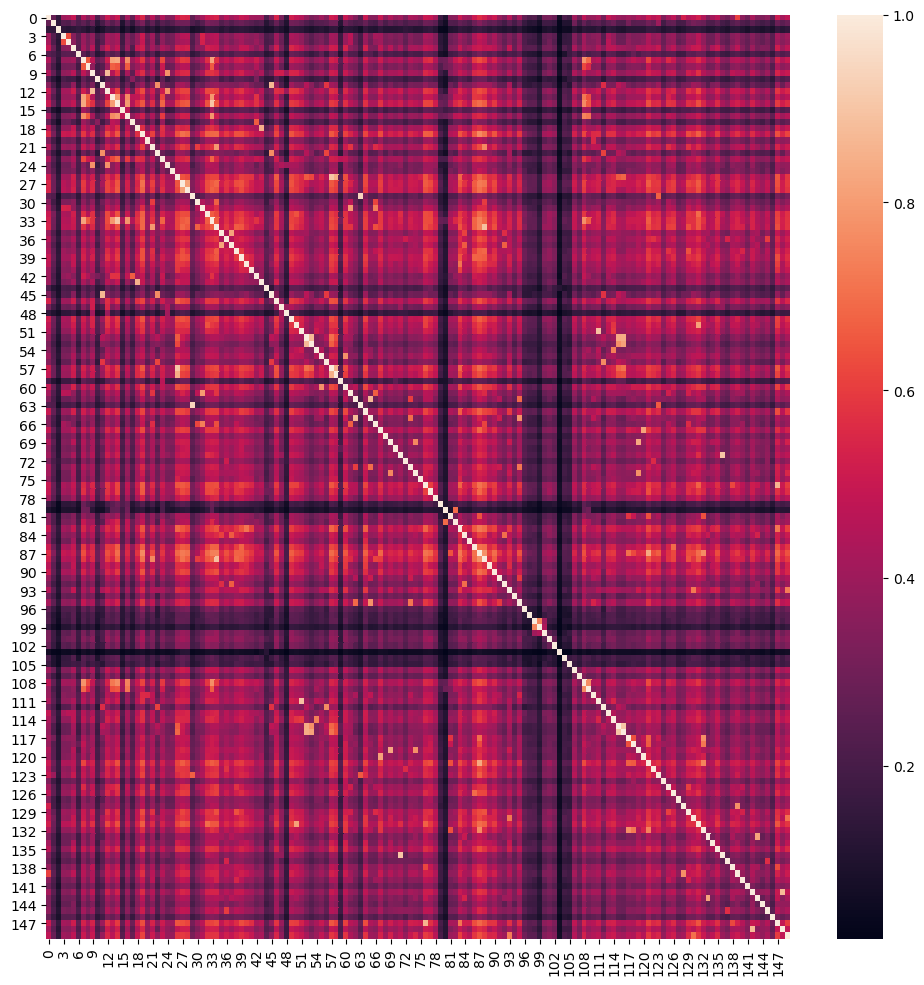

In [14]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 12)

sns.heatmap(cos_array)

### 3D 시각화

In [15]:
cos_array

array([[1.        , 0.27347263, 0.14428168, ..., 0.50714227, 0.41600831,
        0.47581219],
       [0.27347263, 1.        , 0.1440072 , ..., 0.28869998, 0.24737718,
        0.27752291],
       [0.14428168, 0.1440072 , 1.        , ..., 0.15026153, 0.12184873,
        0.13945604],
       ...,
       [0.50714227, 0.28869998, 0.15026153, ..., 1.        , 0.49252978,
        0.59685734],
       [0.41600831, 0.24737718, 0.12184873, ..., 0.49252978, 1.        ,
        0.48497233],
       [0.47581219, 0.27752291, 0.13945604, ..., 0.59685734, 0.48497233,
        1.        ]])

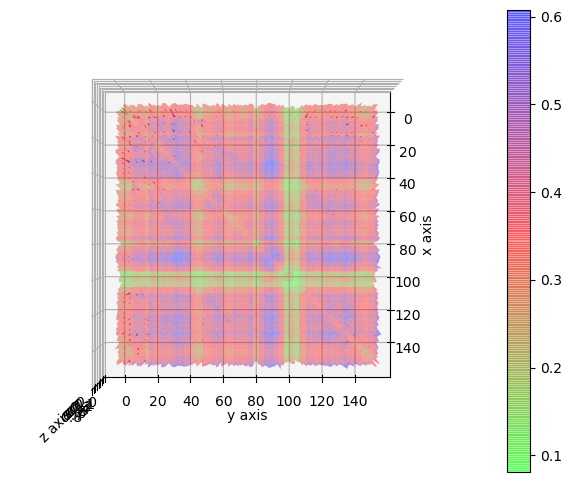

In [16]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

cos_array_copy = cos_array.copy()

for i in range(cos_array.shape[0]) :
    cos_array_copy[i][i] = 0

# surf = ax.plot_surface(np.arange(cos_array.shape[0]), np.arange(cos_array.shape[1]), cos_array_copy)

# ax.plot_wireframe(np.arange(cos_array_copy.shape[0]), np.arange(cos_array_copy.shape[1]), cos_array_copy, cmap="brg_r")

x = np.linspace(-1, cos_array_copy.shape[0], 150)
y = np.linspace(-1, cos_array_copy.shape[0], 150)

X, Y = np.meshgrid(x, y)

plsf = ax.plot_surface(X, Y, cos_array_copy, cmap="brg_r", alpha=0.4)

# ax.view_init(50,35)
ax.view_init(90,0)

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

ax.set_zlim(0, 0.8)


# ax.legend(*plsf.legend_elements())

plt.colorbar(plsf)

plt.show()

# fig.colorbar(surf,shrink=0.5,aspect=5)

### 각 리뷰에 대한 Word Cloud

In [17]:
word_cloud = WordCloud(font_path="c:\\Windows\\Fonts\\HANBatang.ttf", 
                       width=400, height=400,
                       background_color='white')

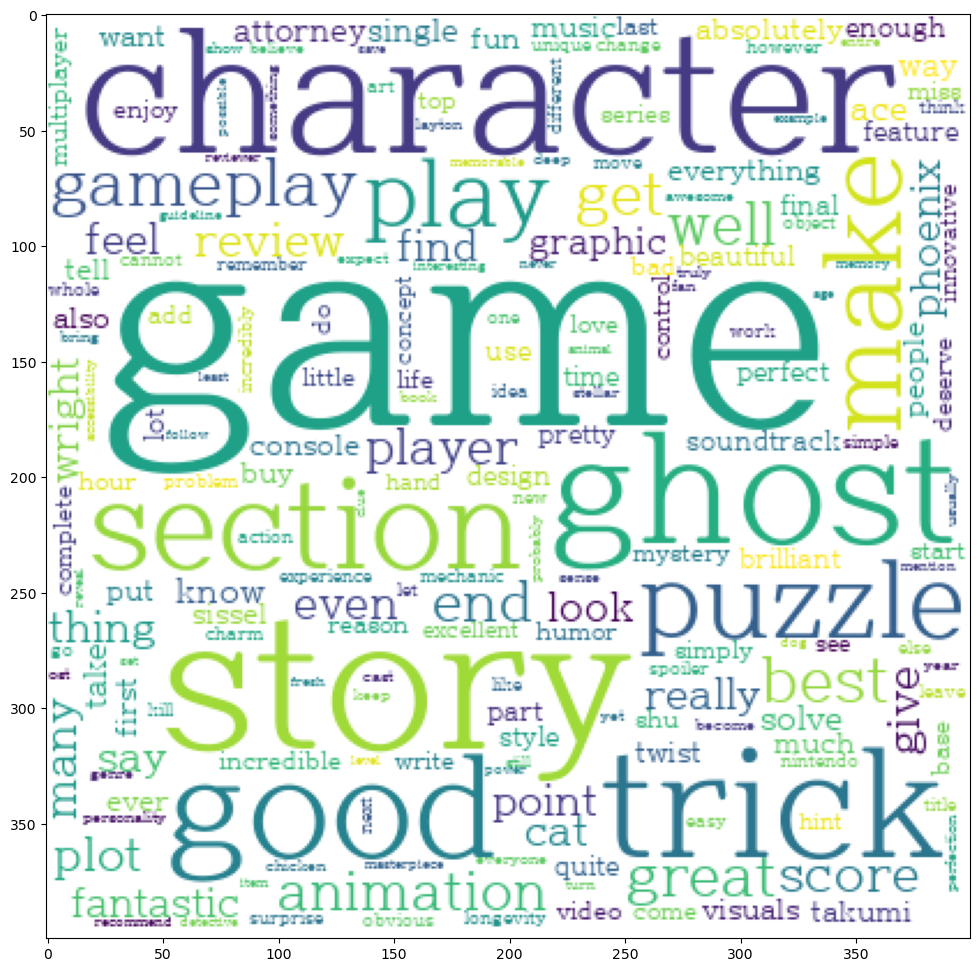

In [18]:
word_cloud.generate_from_frequencies(Counter(b_games_review[0].split()))
plt.imshow(word_cloud)

In [ ]:
for review_index, review_text in tqdm(enumerate(b_games_review), total=len(b_games_review)):
    review_word_dict = Counter(review_text.split())
    word_cloud.generate_from_frequencies(review_word_dict)
    word_cloud.to_file(f'WordCloud/BestReview/b{review_index}.png')

 83%|██████████████████████████████████████████████████████████████████▋             | 125/150 [01:52<00:23,  1.07it/s]

~~DataFrame 병합과정에서 원래 게임 순서가 유지되지 않고 섞였을 가능성이 있으므로 확인하여 파일 이름을 통한 인덱스 설정 방안 고려~~ 완료